<a href="https://colab.research.google.com/github/mcstroh/python-tutorials/blob/solutions/multiwavelength_imaging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Viewing the universe in different colors and wavelengths
---
<div>Michael C. Stroh</br>
michael.stroh@northwestern.edu</br>
Center for Interdisciplinary Exploration and Research in Astrophysics</br>
Northwestern University</br>
2021
</div>

---


## Section 1: Background

### Section 1.1: The Electromagnetic Spectrum

Since the Sun shines in the the optical portion of the electromagnetic spectrum, we have evolved to observe optical light. 
Radio, infrared, ultraviolet, X-rays and gamma rays are also important types of light, that we can also use to study the universe.
In this project, you will create images from different parts of the electromagnetic spectrum.

![](https://upload.wikimedia.org/wikipedia/commons/9/99/EM_Spectrum3-new.jpg)

Above is a cartoon from NASA that shows different ways to characterize the electromagnetic spectrum.

* Hotter things are 'bluer,' while colder things are 'redder.'
* Temperature is related to the frequency. Frequency is often specified in units of Hz (hertz) and 1 Hz is equal to units of s$^{-1}$. In the case of light, the frequency specifies how often the light peaks in one second if using units of Hz.

We have two key equations to convert between energy, frequency and wavelength:
1. $E=hf$, and 
2. $c = f\lambda$.

* $E$ is the energy (units of Joules which is equal to $\textrm{kg}\,\textrm{m}^2\,\textrm{s}^{-2}$ in SI).
* $h$ is Plank's constant ($6.626\times10^{-34}\,\textrm{m}^2\,\textrm{kg}\,\textrm{s}^{-1}$ in SI).
* $f$ is the frequency (units of Hz or s$^{-1}$ in SI).
* $c$ is the speed of light ($2.9979\times10^{8}\,\textrm{m/s}$ in SI)
* $\lambda$ is the wavelength (units of meters in SI).

Combining these two equations and the image above, you should be able to think of these properties as:

* Redder things emit longer wavelength light, but lower frequencies.
* Bluer things emit smaller wavelength light, but higher frequencies.

Astronomers often need to convert between energy, frequency and wavelength. Some astronomers also are more comfortable viewing astronomy in terms of one of these quantities and convert as necessary.

### Section 1.2: Different types of telescopes

In this project, you will use images from the following telescopes.

#### Pan-STARRS
![](https://outerspace.stsci.edu/download/attachments/10257385/PanSTARRS1_dome_small.jpg?version=2&modificationDate=1482088820000&api=v2)

The Panoramic Survey Telescope and Rapid Response System (referred to as Pan-STARRS) is located in Hawaii and observes the sky in optical and infrared filters. More information can be found at [https://panstarrs.stsci.edu/](https://panstarrs.stsci.edu/).

#### The VLA
![](https://science.nrao.edu/facilities/vla/images/vla_panorama_lo.jpg/image_large)

The Karl G. Jansky Very Large Array (referred to as the VLA) consists of 27 large radio telescopes in New Mexico. The VLA combines the signal from all of the dishes to act as a much larger telescope. More information on the VLA can be found at [https://public.nrao.edu/telescopes/vla/](https://public.nrao.edu/telescopes/vla/).

####Chandra
![](https://svs.gsfc.nasa.gov/vis/a010000/a011100/a011185/Image4_1024x576.jpg)

The Chandra X-ray Observatory is NASA's premier X-ray observatory and orbits the Earth in a 64 hour orbit.

### Section 1.3: The Crab Nebula

In this project, you will be using images of the Crab Nebula.
The Crab Nebula was created by a supernova that happened in 1054 AD, and was was observed by Chinese astronomers.
at the center of the supernova remnant lies a pulsar (a spinning neutron star). This pulsar, the Crab pulsar, is the collapsed remains of the star. 

More information about the Crab Nebula can be found at the following links:
* [NASA page on the Crab Nebula](https://www.nasa.gov/feature/goddard/2017/messier-1-the-crab-nebula)
* [Wikipedia Crab Nebula page](https://en.wikipedia.org/wiki/Crab_Nebula)


## Section 2: Optical images - a wavelength view of the electromagnetic spectrum


![](https://outerspace.stsci.edu/download/attachments/10257347/tonryphotometricsystem.jpg?version=1&modificationDate=1481813549000&api=v2)

This figure is from [Tonry et al. (2012)](https://ui.adsabs.harvard.edu/abs/2012ApJ...750...99T/abstract).

Each line in the figure corresponds to a filter used by Pan-STARRS.
The filters we will use are the g (shown in green), r (shown in red), i (shown in yellow).
The x-axis in the figure indicates the wavelengths (in nanometers) covered by the Pan-STARRS filters.
The y-axis can be thought of how sensitive the telescope is to detecting light at each filter at that wavelength. 
As an example, you can see that the red filter covers wavelengths from around 550 to 700 nm.


### Section 2.1: Downloading an image

Run the following cell to download three images taken by PanSTARRS taken in the g, r, and i filters.

In [1]:
!wget -O crab_nebula_i.fits "https://ps1images.stsci.edu/cgi-bin/fitscut.cgi?ra=83.63308333333332&dec=22.0145&size=1200&format=fits&red=/rings.v3.skycell/1784/059/rings.v3.skycell.1784.059.stk.i.unconv.fits"
!wget -O crab_nebula_r.fits "https://ps1images.stsci.edu/cgi-bin/fitscut.cgi?ra=83.63308333333332&dec=22.0145&size=1200&format=fits&red=/rings.v3.skycell/1784/059/rings.v3.skycell.1784.059.stk.r.unconv.fits"
!wget -O crab_nebula_g.fits "https://ps1images.stsci.edu/cgi-bin/fitscut.cgi?ra=83.63308333333332&dec=22.0145&size=1200&format=fits&red=/rings.v3.skycell/1784/059/rings.v3.skycell.1784.059.stk.g.unconv.fits"

--2021-06-30 20:40:33--  https://ps1images.stsci.edu/cgi-bin/fitscut.cgi?ra=83.63308333333332&dec=22.0145&size=1200&format=fits&red=/rings.v3.skycell/1784/059/rings.v3.skycell.1784.059.stk.i.unconv.fits
Resolving ps1images.stsci.edu (ps1images.stsci.edu)... 130.167.250.173
Connecting to ps1images.stsci.edu (ps1images.stsci.edu)|130.167.250.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5780160 (5.5M) [image/x-fits]
Saving to: ‘crab_nebula_i.fits’

crab_nebula_i.fits  100%[===================>]   5.51M  32.3MB/s    in 0.2s    

2021-06-30 20:40:34 (32.3 MB/s) - ‘crab_nebula_i.fits’ saved [5780160/5780160]

--2021-06-30 20:40:34--  https://ps1images.stsci.edu/cgi-bin/fitscut.cgi?ra=83.63308333333332&dec=22.0145&size=1200&format=fits&red=/rings.v3.skycell/1784/059/rings.v3.skycell.1784.059.stk.r.unconv.fits
Resolving ps1images.stsci.edu (ps1images.stsci.edu)... 130.167.250.173
Connecting to ps1images.stsci.edu (ps1images.stsci.edu)|130.167.250.173|:443... co

Run the next cell to see a list of the files in your directory. You should now see crab_nebula_i.fits, crab_nebula_r.fits, and crab_nebula_g.fits corresponding to the three different filters we will use (i, r, and g).

In [2]:
!ls

chandra_b_bandpass.fits  crab_nebula_i.fits  crab_nvss.fits
crab_nebula_g.fits	 crab_nebula_r.fits  sample_data


### Section 2.2: Create your first image

Create an image using one of the three optical files you have downloaded.

You may find it useful to reference the [astropy imaging notebook](https://github.com/psheehan/CIERA-HS-Program/blob/master/AstropyModule/Astropy-images.ipynb).

It is also recommended to use `norm=LogNorm()` when you use `imshow()` as is demonstrated in the [astropy imaging notebook](https://github.com/psheehan/CIERA-HS-Program/blob/master/AstropyModule/Astropy-images.ipynb).

In [3]:
#
# Some code to help get you started
#

# Set up matplotlib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Import astropy modules
from astropy.io import fits
from matplotlib.colors import LogNorm
from matplotlib.colors import *

Do you notice anything weird about the areas outside of the Crab Nebula in your images?

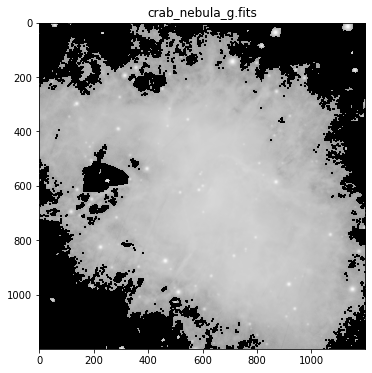

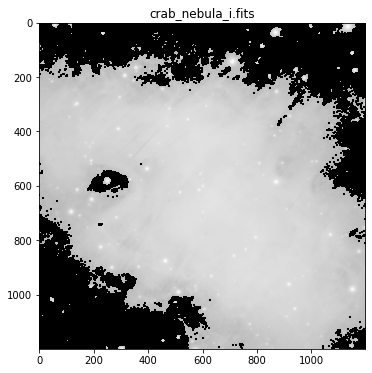

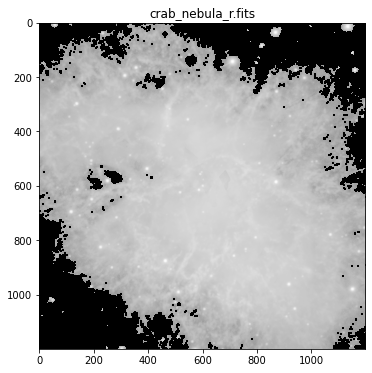

In [4]:
#
# Possible implementation via function to loop over images
#
def show_optical_image_v1(image_name):
    
    hdu_list = fits.open(image_name)
    image_data = hdu_list[0].data
    image_header = hdu_list[0].header
    hdu_list.close()

    # Initialize the colormap
    current_cmap = matplotlib.cm.Greys_r
    current_cmap.set_bad(color='black')
    
    fig, axarr = plt.subplots(1, 1, figsize=(6,6))
    axarr.imshow(image_data, cmap=current_cmap, norm=LogNorm()) 
    axarr.set_title(image_name)
    
    plt.close('fig')


from glob import glob

# Create a list of file names
optical_file_names = sorted(glob('crab_nebula_*.fits'))

# Loop over files to plot all of them
for optical_file_name in optical_file_names:
    show_optical_image_v1(optical_file_name)

Use the figure at the beginning of Section 2. For the image you chose answer the following questions:
* What is the average wavelength sampled by the filter? Use the green line for the g filter, the red line for the r filter, and yellow for the i filter. 
* What is the frequency of light at this wavelength in $m/s$?
* What is the energy of light observed at this wavelength in Joules?

In [ ]:
#
# Notes from figure at the start of Section 2
#
i_wavelength = 750 #nm
r_wavelength = 625 #nm
g_wavelength = 500 #nm - but spans longer range of wavelengths

# Easy unit conversion after

### Section 2.3: Troubleshooting your image

An optical image can be thought of as a grid made up of individual pixels that record the amount of light reaching it. The data recorded from the pixels is combined to form the fits image you are plotting.

There may be pixels without recorded values. These would show up as `null` values in your table. The numpy function `isnan()` may be useful to answer the following questions.
* How many pixels have `null` values?
* Create a version of your table without the null values.

In [5]:
#
# Possible solution
#
for optical_file_name in optical_file_names:
    
    hdu_list = fits.open(optical_file_name)
    image_data = hdu_list[0].data
    image_header = hdu_list[0].header
    hdu_list.close()

    print(f"For {optical_file_name}:")
    print(f"\t{image_data[np.isnan(image_data)].size} pixels have null values out of {image_data.size} ({np.round(image_data[np.isnan(image_data)].size/image_data.size * 100,2)}%).")
    
    # We can filter out the null values by using ~
    not_null_image = image_data[~np.isnan(image_data)]

For crab_nebula_g.fits:
	3 pixels have null values out of 1440000 (0.0%).
For crab_nebula_i.fits:
	1 pixels have null values out of 1440000 (0.0%).
For crab_nebula_r.fits:
	7 pixels have null values out of 1440000 (0.0%).


Unfortunately, plotting your new table likely won't change the image because the pixels still have nothing there. But we are now in a much better place to start these next steps:

* To start to understand what is happening to the areas outside of the Crab Nebula, create a histogram of the pixel values.

Minimum value: -790.959228515625
Maximum value: 362548.84375
Minimum value: -1405.518798828125
Maximum value: 993653.4375
Minimum value: -1430.2520751953125
Maximum value: 618155.8125


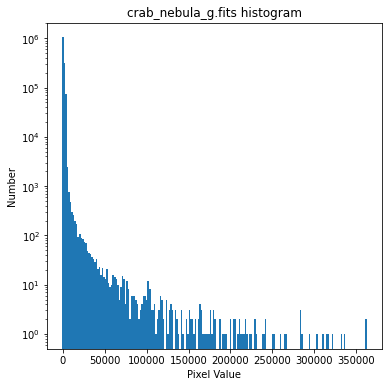

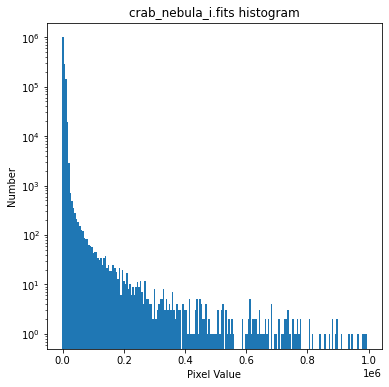

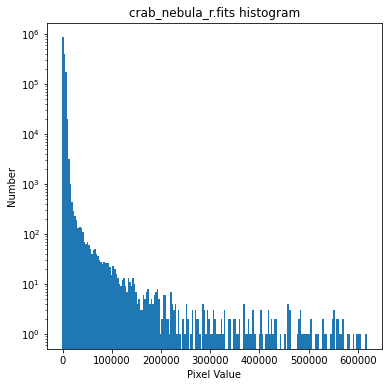

In [6]:
#
# Plossible solution
#

def optical_histogram(image_name):
    
    hdu_list = fits.open(image_name)
    image_data = hdu_list[0].data
    image_header = hdu_list[0].header
    hdu_list.close()

    
    fig, axarr = plt.subplots(1, 1, figsize=(6,6))
    
    # Cleaned data
    new_image_data = image_data[~np.isnan(image_data)]
    axarr.hist(new_image_data, 200, log=True)
    axarr.set_title(image_name + ' histogram')
    axarr.set_ylabel('Number')
    axarr.set_xlabel('Pixel Value')
    print(f"Minimum value: {new_image_data.min()}")
    print(f"Maximum value: {new_image_data.max()}")
    
    plt.close('fig')


for optical_file_name in optical_file_names:
    optical_histogram(optical_file_name)

What are the lowest and highest values recorded in your image?

<font color='blue'>Hint: You can use numpy `min()` and `max()` functions to help find these values.</font>

In [ ]:
#
# Solution done above with figures
#

When using `norm=LogNorm()`, matplotlib converts the normal (linear) scaling to a logarithmic one.
* What happens when you take the logarithm of your minimum and maximum cell values that you found in the previous step?

In [7]:
#
# Demonstrate the issue
#
print(np.log(-1000))

# Everything outside of the main part of the image is not being plotted

nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


You now know which values are causing the problem with our chosen scaling.
* Create a new table that adds or subtracts to the image by an amount so that the scaling does not cause problems.

* Plot this new image.

* How does it look now?

* What is the minimum value you need to adjust your image by for it to look better?

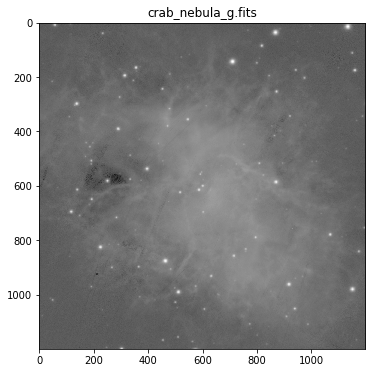

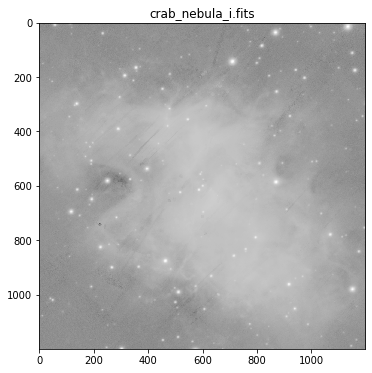

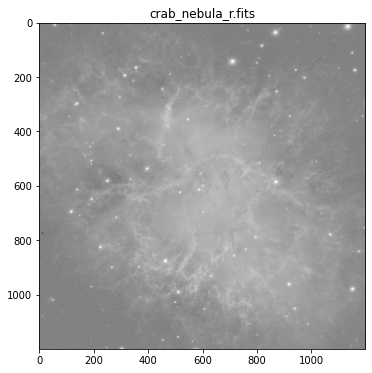

In [8]:
#
# Potential solution
#
def show_optical_image_v2(image_name):
    
    hdu_list = fits.open(image_name)
    image_data = hdu_list[0].data
    image_header = hdu_list[0].header
    hdu_list.close()

    # Initialize the colormap
    current_cmap = matplotlib.cm.Greys_r
    current_cmap.set_bad(color='black')
    
    fig, axarr = plt.subplots(1, 1, figsize=(6,6))

    # Account for minimum value so that everything is > 0
    # Note to preserve the shape, you may need to keep the first part (image_data) the same
    new_image_data = image_data - image_data[~np.isnan(image_data)].min()

    # Note here you can use interpolation with different options to help with null values
    axarr.imshow(new_image_data, cmap=current_cmap, norm=LogNorm(), interpolation='nearest') 
    axarr.set_title(image_name)
    
    plt.close('fig')


# Loop over files to plot all of them
for optical_file_name in optical_file_names:
    show_optical_image_v2(optical_file_name)

### Section 2.4: Create images from all three filters

Now that you've successfully created an image for one filter. 

* Create images for **each** of the three filters you downloaded earlier. 

<font color='blue'>Hint: It might save work for you to place your plotting code from the previous sections into a function and/or loop to save you time and create consistency.</font>

In [ ]:
#
# Did above since the example uses functions
#

For *all three images*:

* What is the frequency of light at this wavelength in $m/s$?
* What is the energy of the photons observed at this wavelength in Joules?

<font color='blue'>Hint: You should have already calculated this for one of the images you created.</font>

In [ ]:
#
# Simple unit conversion
#

Some questions to reflect on:
*   Are there parts *within* the Crab Nebula that you see better in one image than the others?
*   Are there regions *outside* of the Crab Nebula that appear better in one filter than the others?
*   Do you have an image that you think looks best overall?

In [ ]:
#
# Looking for comments, nothing in particular needed.
#

## Section 3: Radio observations - a frequency view of the electromagnetic spectrum

In this section we will use an image of the Crab Nebula from the VLA. In particular, this image is from the NRAO VLA Sky Survey, which is typically shortened to [NVSS](https://www.cv.nrao.edu/nvss/). You can download an image by running the following cell.

In [9]:
!wget https://github.com/mcstroh/python-tutorials/raw/master/multiwavelength_imaging/images/crab_nvss.fits

--2021-06-30 20:42:11--  https://github.com/mcstroh/python-tutorials/raw/master/multiwavelength_imaging/images/crab_nvss.fits
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mcstroh/python-tutorials/master/multiwavelength_imaging/images/crab_nvss.fits [following]
--2021-06-30 20:42:12--  https://raw.githubusercontent.com/mcstroh/python-tutorials/master/multiwavelength_imaging/images/crab_nvss.fits
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 826560 (807K) [application/octet-stream]
Saving to: ‘crab_nvss.fits.1’

crab_nvss.fits.1    100%[===================>] 807.19K  --.-KB/s    in 0.05s   



Create an image of this file and compare it to the optical images.

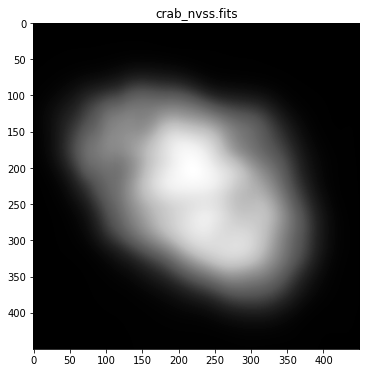

In [10]:
#
# Potential solution - steal from optical
#
def show_radio_image(image_name):
    
    hdu_list = fits.open(image_name)
    image_data = hdu_list[0].data[0][0]
    image_header = hdu_list[0].header
    hdu_list.close()

    # Initialize the colormap
    current_cmap = matplotlib.cm.Greys_r # Can switch to Greys_r which may have more contrast
    current_cmap.set_bad(color='black')
    
    fig, axarr = plt.subplots(1, 1, figsize=(6,6))

    new_image_data = image_data - image_data[~np.isnan(image_data)].min()
    axarr.imshow(new_image_data, cmap=current_cmap) # Can remove norm argument
    axarr.set_title(image_name)
    
    plt.close('fig')

show_radio_image('crab_nvss.fits')


How does this image compare to the optical images?

In [ ]:
#
# It should look pretty poor compared to the optical images. 
# Note we could use the VLASS QuickLook image, but it has a lot of imaging artifacts since it is so bright.

We can measure the size of the pixels in arcseconds. One arcsecond is equal to 1/3600 of a degree.

The NVSS image originally had pixels that are approximately 15 arcseconds across. The optical images had pixels that were approximately 0.26 arcseconds across. Does this help explain the difference between the optical and radio images?

In [ ]:
#
# We only want them to think here.
#

This radio image was taken at a frequency of 1 GHz or $10^{9}\,\textrm{Hz}.$ 

* What is the energy of the photons observed at this frequency in Joules?
* What is the wavelength of light at this frequency in meters?
* How much larger is the wavelength of the radio observations than the optical images you created in the previous section?

## Section 4: X-ray observations - an energy view of the electromagnetic spectrum

We will download an image taken by the [Chandra X-ray Observatory](https://chandra.harvard.edu/). 

Run the following cell to download a file named `chandra_b_bandpass.fits` that you will use in the following steps.

In [11]:
!wget -O chandra_b_bandpass.fits 'https://cda.cfa.harvard.edu/csccli/retrieveFile?filename=acisf13210_000N020_b_img3.fits&filetype=ecorrimg&version=cur'

--2021-06-30 20:42:36--  https://cda.cfa.harvard.edu/csccli/retrieveFile?filename=acisf13210_000N020_b_img3.fits&filetype=ecorrimg&version=cur
Resolving cda.cfa.harvard.edu (cda.cfa.harvard.edu)... 131.142.198.67
Connecting to cda.cfa.harvard.edu (cda.cfa.harvard.edu)|131.142.198.67|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: http://cda.cfa.harvard.edu/csccli/retrieveFile?filename=acisf13210_000N020_b_img3.fits&filetype=ecorrimg&version=cur [following]
--2021-06-30 20:42:36--  http://cda.cfa.harvard.edu/csccli/retrieveFile?filename=acisf13210_000N020_b_img3.fits&filetype=ecorrimg&version=cur
Connecting to cda.cfa.harvard.edu (cda.cfa.harvard.edu)|131.142.198.67|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/fits]
Saving to: ‘chandra_b_bandpass.fits’

chandra_b_bandpass.     [ <=>                ] 707.97K  --.-KB/s    in 0.1s    

2021-06-30 20:42:37 (5.90 MB/s) - ‘chandra_b_bandpass.fits’ saved

### Section 4.1: Create an image

Create an image of the region in X-rays.

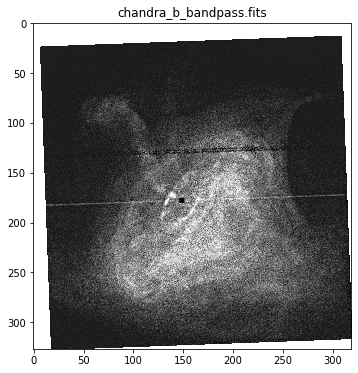

In [12]:
#
# Possible solution building on optical solutions
#
def show_chandra_image(image_name):
    
    hdu_list = fits.open(image_name)
    image_data = hdu_list[0].data
    image_header = hdu_list[0].header
    hdu_list.close()

    # Initialize the colormap
    current_cmap = matplotlib.cm.Greys_r # Reversed for preference
    current_cmap.set_bad(color='white')
    
    fig, axarr = plt.subplots(1, 1, figsize=(6,6))

    axarr.imshow(image_data, cmap=current_cmap) # May want to remove the normalization here
    axarr.set_title(image_name)
    
    plt.close('fig')


show_chandra_image('chandra_b_bandpass.fits')

Compare this image to the optical and radio images you created. Is it similar or does it look significantly different?

In [ ]:
#
# Should see that it is quite different in shape than the others since we are seeing the pulsar in the center forming a jet.
#

Are there any irregularities in this image (gaps, missing data, or anything else)? If so, describe these problems and how they are different than the issues we found with the optical images.

In [ ]:
#
# Placeholder for code or comments
#

X-ray astronomers usually describe the part of the electromagnetic spectrum they are observing in terms of the energies they are observing in units of electron volts (eV). $1\,\textrm{eV} = 1.6022\times10^{−19}\,\textrm{J}$.

This image contains observations at approximately 2.3 keV (or $2.3\times10^3\,$eV).
By combining equations 1 and 2 from the introduction, and converting our equations from Joules (SI units) to electron volts (favored by X-ray astronomers), we have the following:

$\lambda = \frac{h c}{E}$

where 
* E is the energy, 
* h is Planck's constant ($4.1357\times10^{-15}\,\textrm{eV}\,\textrm{s}$), and
* c is the speed of light ($2.9979\times10^{8}\,\textrm{m/s}$).

Aided with the equations 1, 2 and the equation above:

* Calculate the wavelength and frequency of the X-ray light.

In [ ]:
#
# Placeholder for code or comments
#

Final questions:
* How much more energetic are the X-ray photons you are observing compared to the optical and radio photons?
* How does the frequency compare to the optical and radio images?

In [ ]:
#
# Placeholder for code or comments
#

## Section 6: More information

Here are some additional links:

*   [Radio/infrared/optical/ultraviolet/X-ray Crab Nebula](https://public.nrao.edu/gallery/a-new-look-at-the-crab-nebula-individual-wavelength-thumbnails/)
*   [Astronomy picture of the day](https://apod.nasa.gov/apod/astropix.html)


# Section 7: Developing this notebook

## Section 2: Find the optical images

The following snippets will find the appropriate links to download the optical data from PanSTARRS1. These could possibly change over time.

In [17]:
#
# Load this cell, it's not important to understand what it is doing
# - This is based off code originally developed by Giacomo Terreran
#

import astropy
import numpy as np
import urllib

def ps_get_images_list(ra, decl, size=240, filters='grizy'):
    """Query ps1filenames.py service to get a list of images
		
    ra, decl = position in degrees
    size = image size in pixels (0.25 arcsec/pixel)
    filters = string with filters to include
    Returns a table with the results
    """
	
    ps1_base_url = "https://ps1images.stsci.edu/cgi-bin/ps1filenames.py"
    url = "{0}?ra={1}&dec={2}&size={3}&format=fits&filters={4}".format(ps1_base_url, ra, decl, size, filters)

    return astropy.table.Table.read(url, format='ascii') # Note, using Table is a little overkill



def ps_get_url(ra, decl, size=240, format='fits', filters='grizy', output_size = None):

    ps1_base_url = "https://ps1images.stsci.edu/cgi-bin/fitscut.cgi"
    table = ps_get_images_list(ra, decl, size=size, filters=filters)
    url = "{0}?ra={1}&dec={2}&size={3}&format={4}".format(ps1_base_url, ra, decl, size, format)
    if output_size is not None:
        url = url + "&output_size={0}".format(output_size)
    
    #
    # Sort filters from by increasing frequency
    #
    flist = [ 'yzirg'.find(x) for x in table[ 'filter' ] ]
    table = table[ np.argsort(flist) ]
    urlbase = url + "&red="

    final_url = list()
    for filename in table['filename']:
        final_url.append(urlbase + filename)

    return final_url



def ps_download_fits(ra, decl, size=600, filters='r', output_fits_location = '/tmp'):

    fits_url = ps_get_url(ra, decl, size=size, filters=filters)
    if len(fits_url) == 0:
        print('Position has no PS1 data.')
        return None

    files_downloaded = list()
    for url in fits_url:
        
        filter_name = url.split('.')[-3]
        download_location = f"{output_fits_location}/temp_ps_{filter_name}.fits"
        print(f"Downloading {url} to {download_location}")
        urllib.request.urlretrieve(url, download_location)
        files_downloaded.append(download_location)

    return files_downloaded


In [ ]:
ra_crab = 83.63308333333332 # Right ascension of the Crab Nebula from SIMBAD
decl_crab = 22.0145 # Declination of the Crab Nebula from SIMBAD
crab_image_file_names = ps_download_fits(ra_crab, decl_crab, output_fits_location = '.', filters='gri', size=1200)

### Section 3.1 Downloading radio observations (VLASS)

Run the following command to download an image from the VLA that contains the Crab Nebula.

In [19]:
!wget -O vla_crab.fits "https://archive-new.nrao.edu/vlass/quicklook/VLASS1.2/T16t08/VLASS1.2.ql.T16t08.J053424+223000.10.2048.v1/VLASS1.2.ql.T16t08.J053424+223000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits"

--2021-06-30 20:49:29--  https://archive-new.nrao.edu/vlass/quicklook/VLASS1.2/T16t08/VLASS1.2.ql.T16t08.J053424+223000.10.2048.v1/VLASS1.2.ql.T16t08.J053424+223000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits
Resolving archive-new.nrao.edu (archive-new.nrao.edu)... 146.88.1.66
Connecting to archive-new.nrao.edu (archive-new.nrao.edu)|146.88.1.66|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/fits]
Saving to: ‘vla_crab.fits’

vla_crab.fits           [       <=>          ]  52.86M  36.8MB/s    in 1.4s    

2021-06-30 20:49:31 (36.8 MB/s) - ‘vla_crab.fits’ saved [55425600]



Filename: vla_crab.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     135   (3722, 3722, 1, 1)   float32   
(3722, 3722)


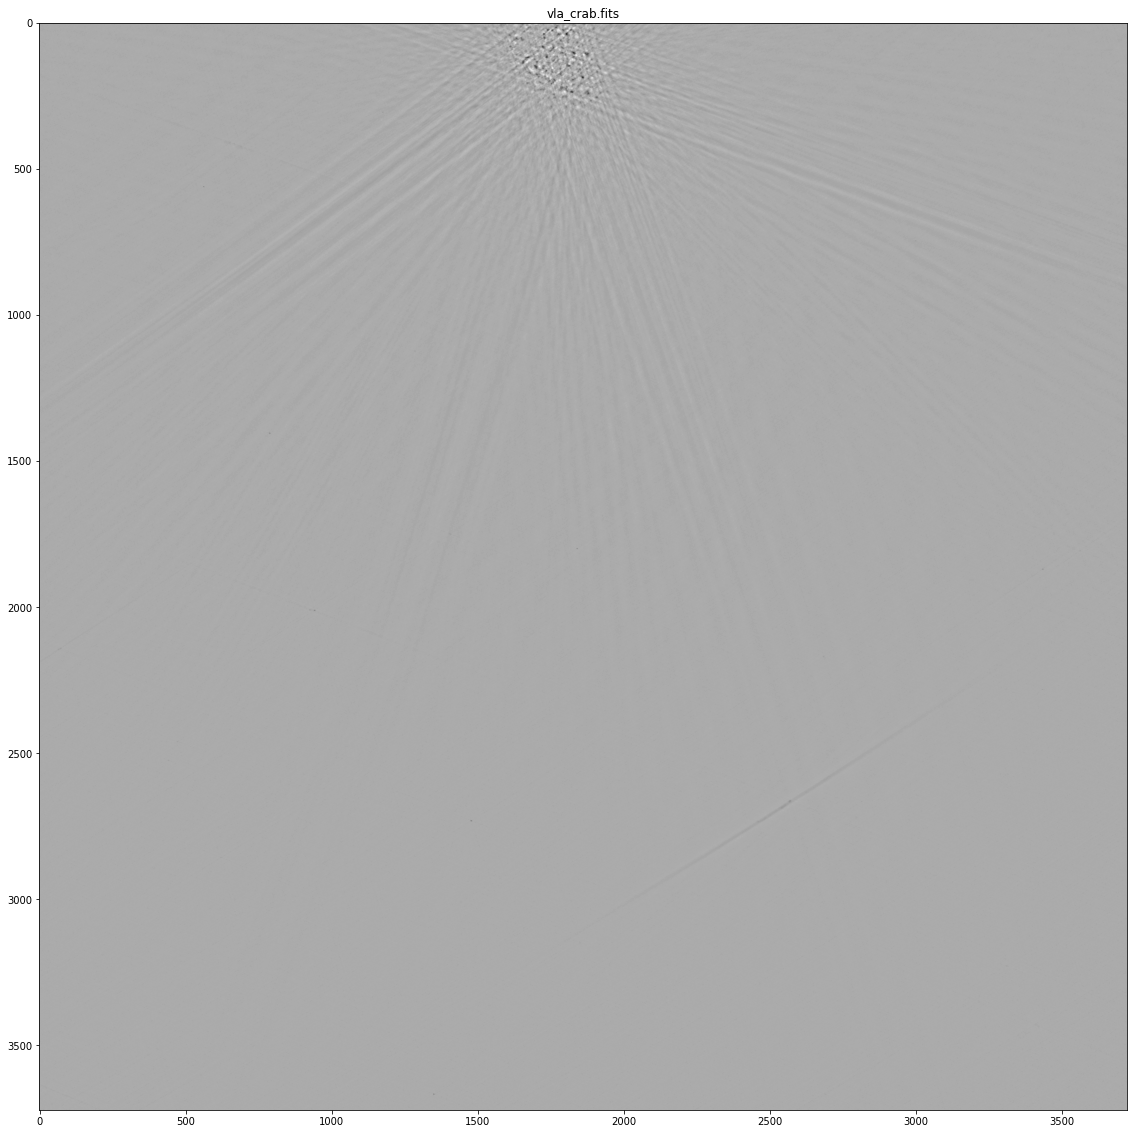

In [20]:
def show_vla_image(image_name):
    
    hdu_list = fits.open(image_name)
    hdu_list.info()
    image_data = hdu_list[0].data[0][0]
    image_header = hdu_list[0].header
    hdu_list.close()

    print(image_data.shape)

    current_cmap = matplotlib.cm.Greys#_r#.get_cmap()
    current_cmap.set_bad(color='white')
    
    fig, axarr = plt.subplots(1, 1, figsize=(20,20))
    axarr.imshow(image_data - image_data[~np.isnan(image_data)].min(), cmap=current_cmap) ##cmap='gray', 
    axarr.set_title(image_name)
    
    plt.close('fig')


show_vla_image('vla_crab.fits')

## Section 4: List (and plot) all possible Chandra images
From here, you can choose different images to choose from. Some represent different bandpasses (such as harder or softer X-ray bands).

In [21]:
chandra_url = f"http://cda.cfa.harvard.edu/csc2siap/queryImages?POS={ra_crab},{decl_crab}&SIZE=0.5&VERB=1&FORMAT=image/fits"
print(chandra_url)

import os
os.system(f"wget -O out.vot '{chandra_url}'")


http://cda.cfa.harvard.edu/csc2siap/queryImages?POS=83.63308333333332,22.0145&SIZE=0.5&VERB=1&FORMAT=image/fits


0

In [24]:
from astropy.io.votable import parse
import pandas as pd

def votable_to_pandas(file_name):
  votable = parse(file_name)
  table = votable.get_first_table().to_table(use_names_over_ids=True)
  return table.to_pandas()

In [25]:
import re
chandra_df = votable_to_pandas('out.vot')
print(chandra_df.columns)
for index, row in chandra_df.iterrows():
#  print(index, row.name, row.imgscale, row.accref)
  file_name = row.accref.split('filename=')[-1].split('&')[0]
  if re.search('_b_',file_name):
      print(file_name)
      os.system(f"wget -O {file_name} '{row.accref}'")

Index(['band', 'name', 'ra', 'dec', 'naxis', 'imgscale', 'imgfmt', 'accref'], dtype='object')
acisf04607_000N020_b_img3.fits
acisf02798_002N020_b_img3.fits
acisf00769_000N020_b_img3.fits
acisf00770_000N020_b_img3.fits
acisf00771_000N020_b_img3.fits
acisf00772_000N020_b_img3.fits
acisf00773_000N020_b_img3.fits
acisf01994_000N020_b_img3.fits
acisf01995_000N020_b_img3.fits
acisf01997_000N020_b_img3.fits
acisf01998_000N020_b_img3.fits
acisf01999_000N020_b_img3.fits
acisf02001_000N020_b_img3.fits
acisf13139_000N020_b_img3.fits
acisf13146_000N020_b_img3.fits
acisf13147_000N020_b_img3.fits
acisf13150_000N020_b_img3.fits
acisf13151_000N020_b_img3.fits
acisf13152_000N020_b_img3.fits
acisf13153_000N020_b_img3.fits
acisf13154_000N020_b_img3.fits
acisf13204_000N020_b_img3.fits
acisf13205_000N020_b_img3.fits
acisf13206_000N020_b_img3.fits
acisf13207_000N020_b_img3.fits
acisf13208_000N020_b_img3.fits
acisf13209_000N020_b_img3.fits
acisf13210_000N020_b_img3.fits
acisf13750_001N020_b_img3.fits
acisf13

Check file sizes

In [26]:
!du -sh *

192K	acisf00769_000N020_b_img3.fits
208K	acisf00770_000N020_b_img3.fits
268K	acisf00771_000N020_b_img3.fits
268K	acisf00772_000N020_b_img3.fits
268K	acisf00773_000N020_b_img3.fits
628K	acisf01994_000N020_b_img3.fits
836K	acisf01995_000N020_b_img3.fits
848K	acisf01997_000N020_b_img3.fits
828K	acisf01998_000N020_b_img3.fits
836K	acisf01999_000N020_b_img3.fits
820K	acisf02001_000N020_b_img3.fits
32M	acisf02798_002N020_b_img3.fits
40M	acisf04607_000N020_b_img3.fits
688K	acisf13139_000N020_b_img3.fits
696K	acisf13146_000N020_b_img3.fits
688K	acisf13147_000N020_b_img3.fits
724K	acisf13150_000N020_b_img3.fits
720K	acisf13151_000N020_b_img3.fits
728K	acisf13152_000N020_b_img3.fits
728K	acisf13153_000N020_b_img3.fits
728K	acisf13154_000N020_b_img3.fits
712K	acisf13204_000N020_b_img3.fits
716K	acisf13205_000N020_b_img3.fits
708K	acisf13206_000N020_b_img3.fits
712K	acisf13207_000N020_b_img3.fits
712K	acisf13208_000N020_b_img3.fits
712K	acisf13209_000N020_b_img3.fits
708K	acisf13210_000N020_b_img3

acisf04607_000N020_b_img3.fits seems to be the largest file. We can check how long the exposure time is.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app


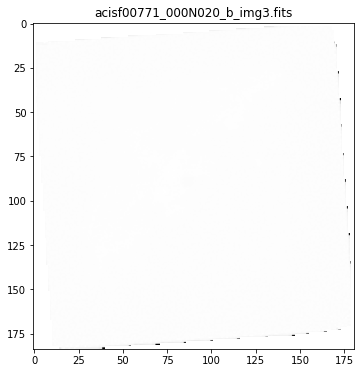

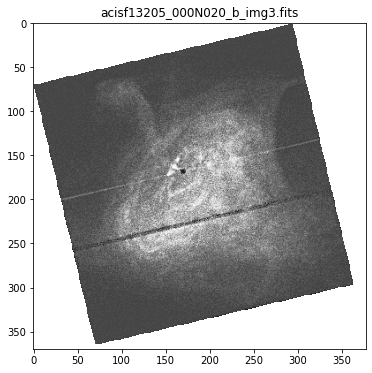

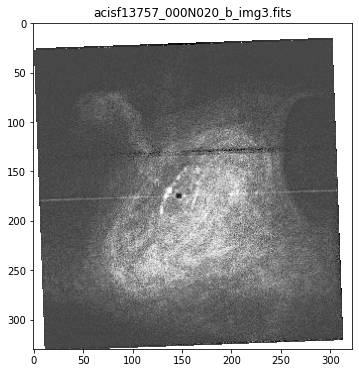

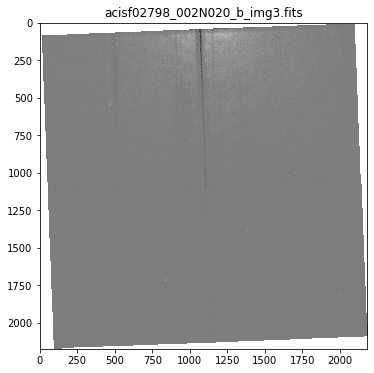

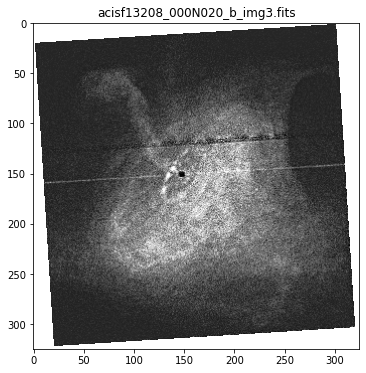

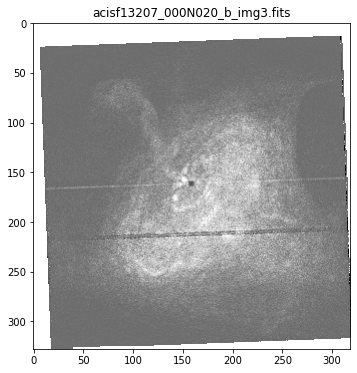

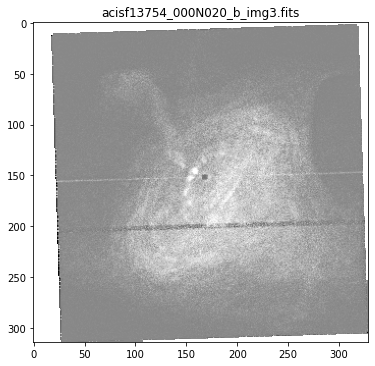

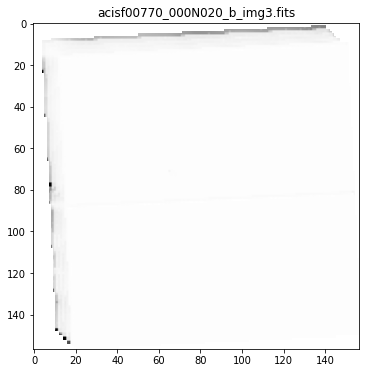

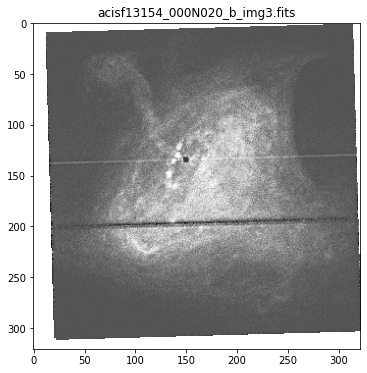

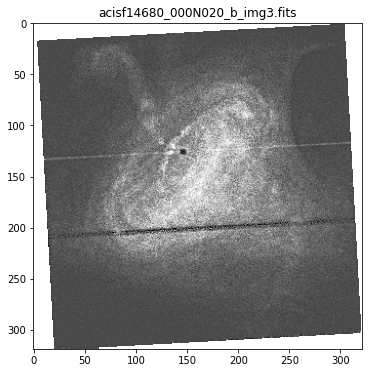

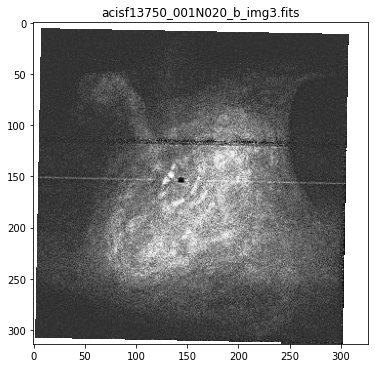

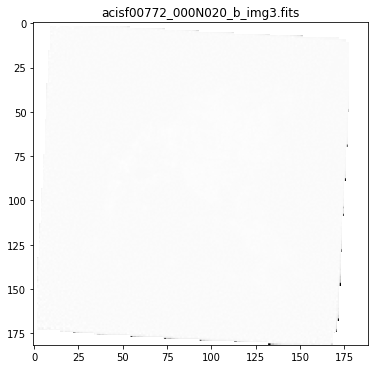

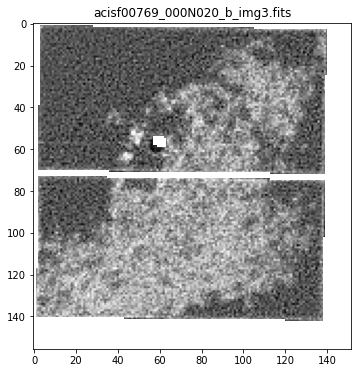

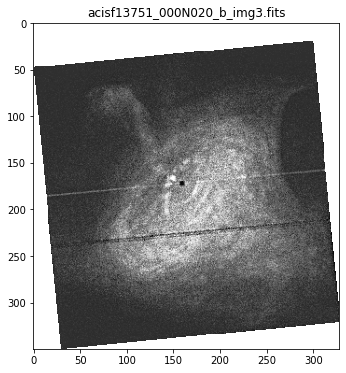

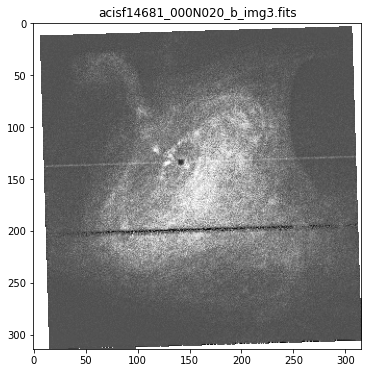

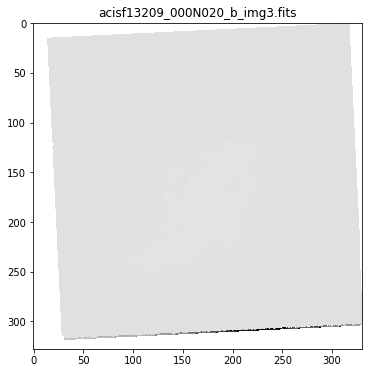

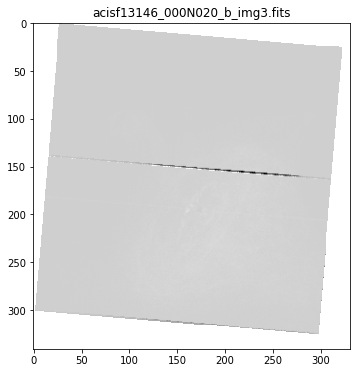

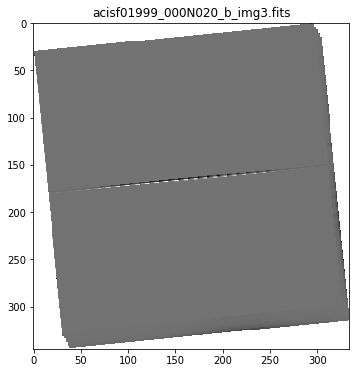

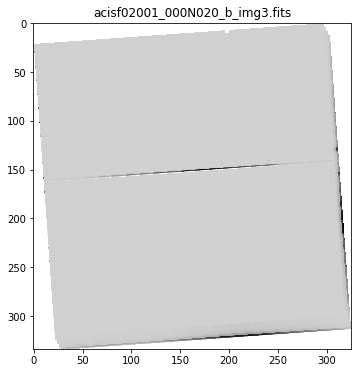

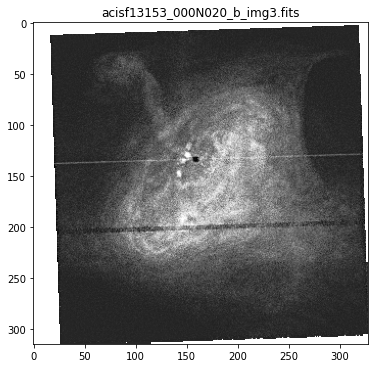

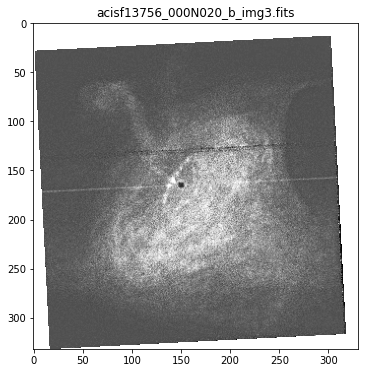

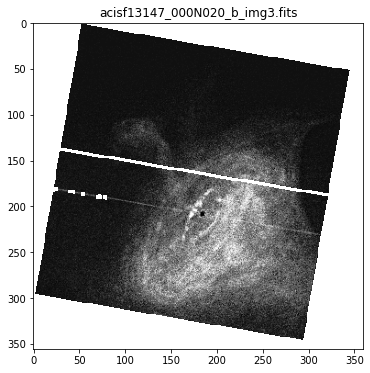

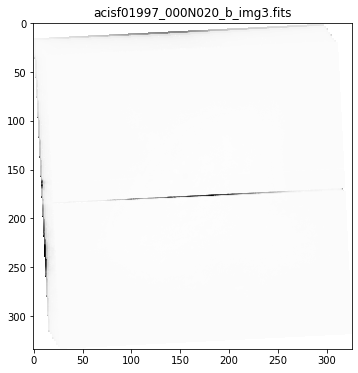

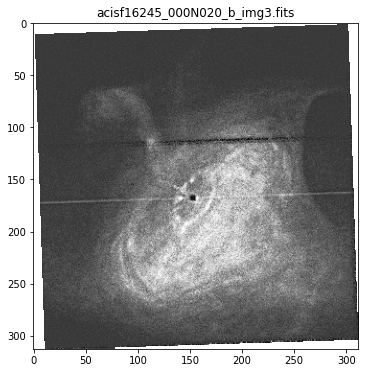

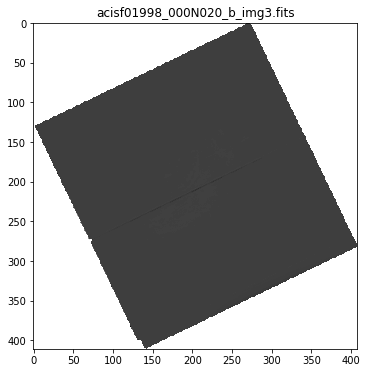

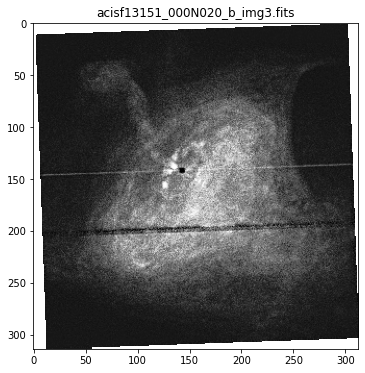

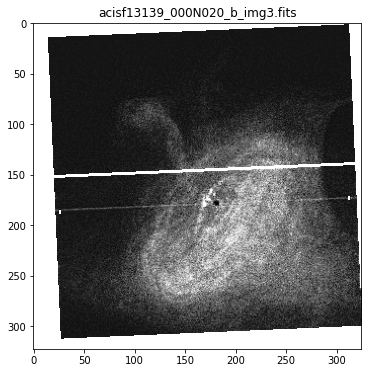

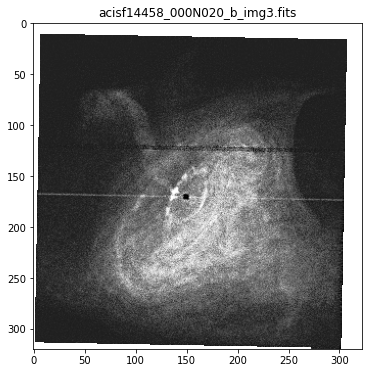

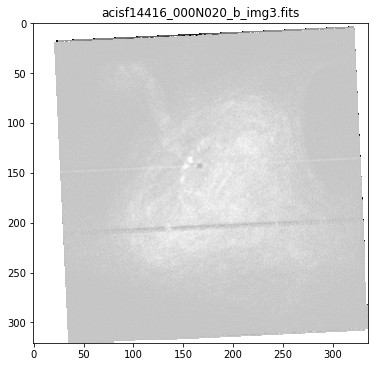

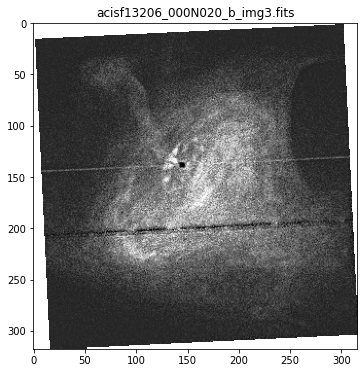

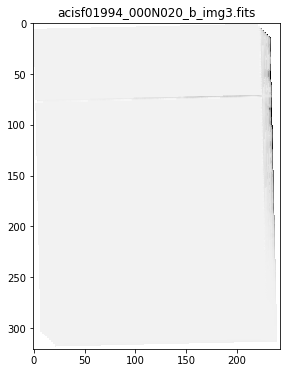

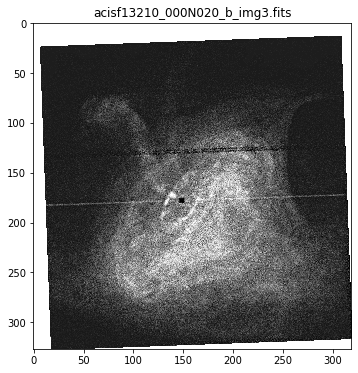

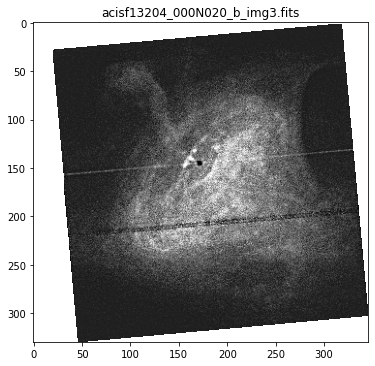

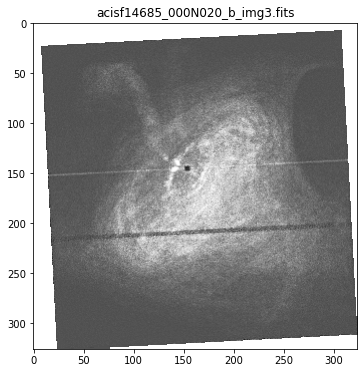

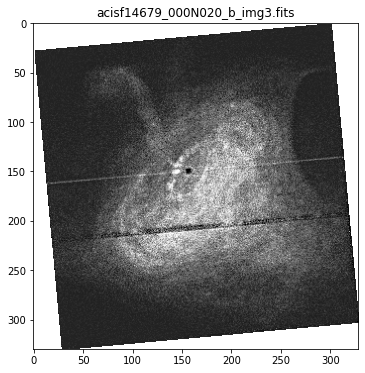

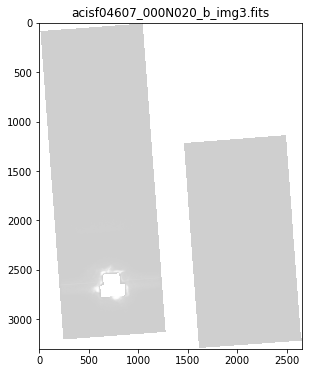

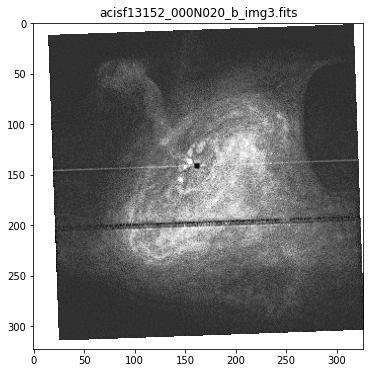

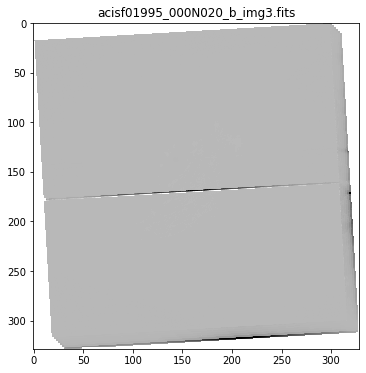

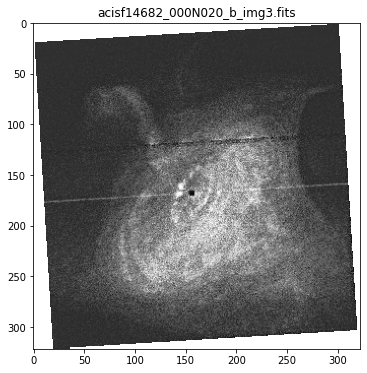

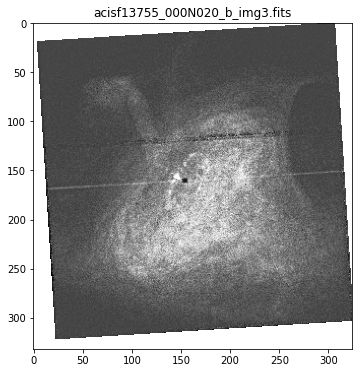

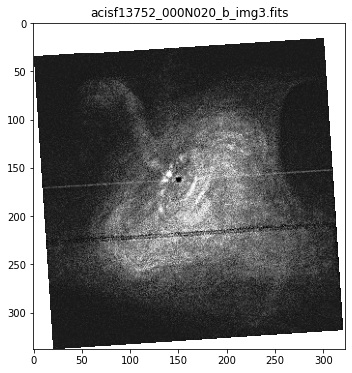

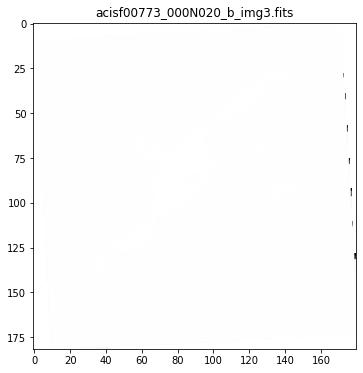

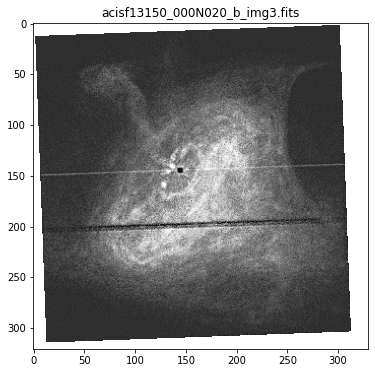

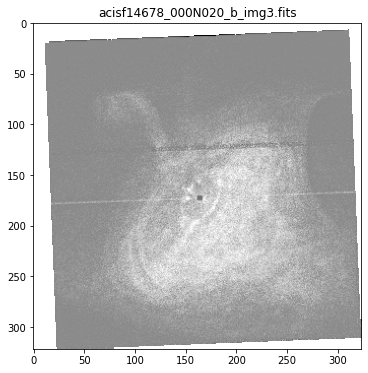

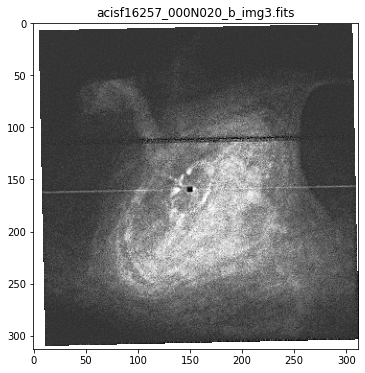

In [28]:
for chandra_file_name in glob('acis*.fits'):
    show_chandra_image(chandra_file_name)

You can now choose an image for the students to use.